In [1]:
import pandas as pd
from sklearn import linear_model, model_selection, datasets, preprocessing, metrics
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
bc = datasets.load_breast_cancer()

In [3]:
bc_dataframe = pd.DataFrame(bc.data)
bc_dataframe.columns = bc.feature_names
bc_dataframe['label'] = bc.target
bc_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Level 1

### Calculate the 5-fold cross validation error of a logistic regression — accounting for any sources of variance in the performance (e.g. random initial weights) — be sure to plot confidence intervals

In [129]:
log_reg_clf = linear_model.SGDClassifier(loss='log', random_state=5)
cv = model_selection.ShuffleSplit(n_splits=5, random_state=5)
cross_val_accs = []
for train_inds, test_inds in cv.split(bc.data):
    train_data = bc.data[train_inds]
    test_data = bc.data[test_inds]
    train_labels = bc.target[train_inds]
    test_labels = bc.target[test_inds]
    normalizer = preprocessing.Normalizer().fit(train_data)
    train_data_norm = normalizer.transform(train_data)
    test_data_norm = normalizer.transform(test_data)
    log_reg_clf.fit(train_data_norm, train_labels)
    cross_val_accs.append(log_reg_clf.score(test_data_norm, test_labels))

In [126]:
print cross_val_accs
cross_val_accs = np.array(cross_val_accs)
mean = cross_val_accs.mean()
std = cross_val_accs.std()
print 'Mean:', mean
print 'Std:', std

[0.8596491228070176, 0.9649122807017544, 0.8771929824561403, 0.8596491228070176, 0.9473684210526315]
Mean: 0.9017543859649123
Std: 0.04520736395342149


<ErrorbarContainer object of 3 artists>

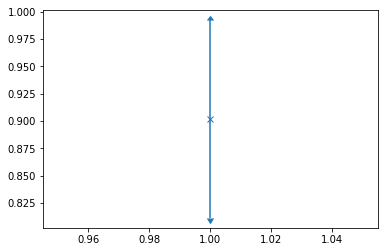

In [6]:
plt.errorbar(1, mean, yerr=2*std, uplims=True, lolims=True, marker='x')

### Calculate the leave-one-out cross validation error of a logistic regression model

In [7]:
log_reg_clf = linear_model.SGDClassifier(loss='log', random_state=0)
cv = model_selection.LeaveOneOut()
cross_val_errs = []
for train_inds, test_inds in cv.split(bc.data):
    train_data = bc.data[train_inds]
    test_data = bc.data[test_inds]
    train_labels = bc.target[train_inds]
    test_labels = bc.target[test_inds]
    normalizer = preprocessing.Normalizer().fit(train_data)
    train_data_norm = normalizer.transform(train_data)
    test_data_norm = normalizer.transform(test_data)
    log_reg_clf.fit(train_data_norm, train_labels)
    tmp_pred = log_reg_clf.predict_proba(test_data_norm)
    cross_val_errs.append(-(test_labels * np.log(tmp_pred[0][1]) + (1 - test_labels) * np.log(1 - tmp_pred[0][1])))

In [8]:
np.array(cross_val_errs).mean()

0.2946542793637793

### Train and test a Support Vector Machine yourself

#### Breast cancer dataset

In [9]:
from sklearn.svm import SVC

In [10]:
for i in range(bc.target.size):
    if bc.target[i] == 0:
        bc.target[i] = -1 

In [11]:


svc = SVC(kernel='linear')

In [12]:
cv = model_selection.ShuffleSplit(n_splits=5, random_state=5)
cross_val_accs = []
for train_inds, test_inds in cv.split(bc.data):
    train_data = bc.data[train_inds]
    test_data = bc.data[test_inds]
    train_labels = bc.target[train_inds]
    test_labels = bc.target[test_inds]
    normalizer = preprocessing.Normalizer().fit(train_data)
    train_data_norm = normalizer.transform(train_data)
    test_data_norm = normalizer.transform(test_data)
    svc.fit(train_data_norm, train_labels)
    cross_val_accs.append(svc.score(test_data_norm, test_labels))

In [13]:
svm_mean = np.array(cross_val_accs).mean()
svm_std = np.array(cross_val_accs).std()
print svm_mean, svm_std

0.8385964912280702 0.030183597428219727


Text(0,0.5,'Accuracy')

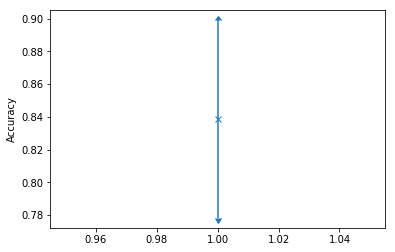

In [14]:
plt.errorbar(1, svm_mean, yerr=2 * svm_std, uplims=True, lolims=True, marker='x')
plt.ylabel('Accuracy')

### Vary the $\gamma$ parameter for the RBF SVM, and plot the error as we vary it in 0.01...10, on a dataset. Why does it not make sense to use negative values?

In [57]:
gamma_hinge_errs_mean = []
gamma_hinge_errs_std = []
gamma_accs = []

gamma_range = np.arange(0.01, 1000, 10)
for gamma in gamma_range:
    svc = SVC(kernel='rbf', gamma=gamma, random_state=5)
    cv = model_selection.ShuffleSplit(n_splits=5, random_state=5)
    hinge_errs = []
    gamma_accuracy = []
    for train_inds, test_inds in cv.split(bc.data):
        train_data = bc.data[train_inds]
        test_data = bc.data[test_inds]
        train_labels = bc.target[train_inds]
        test_labels = bc.target[test_inds]
        normalizer = preprocessing.Normalizer().fit(train_data)
        train_data_norm = normalizer.transform(train_data)
        test_data_norm = normalizer.transform(test_data)
        svc.fit(train_data_norm, train_labels)
        hinge_errs.append(metrics.hinge_loss(test_labels, svc.predict(test_data_norm)))
        gamma_accuracy.append(svc.score(X=test_data_norm, y=test_labels))
    tmp_mean_err = np.array(hinge_errs).mean()
    tmp_std = np.array(hinge_errs).std()
    tmp_mean_acc = np.array(gamma_accuracy).mean()
    gamma_hinge_errs_mean.append(tmp_mean_err)
    gamma_hinge_errs_std.append(tmp_std)
    gamma_accs.append(tmp_mean_acc)

In [16]:
gamma_hinge_errs_stdx2 = [x * 2 for x in gamma_hinge_errs_std]

Text(0.5,0,'Gamma value')

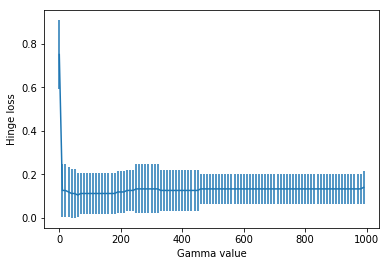

In [17]:
plt.errorbar(gamma_range, gamma_hinge_errs_mean, yerr=gamma_hinge_errs_stdx2)
plt.ylabel('Hinge loss')
plt.xlabel('Gamma value')

Text(0.5,0,'Gamma')

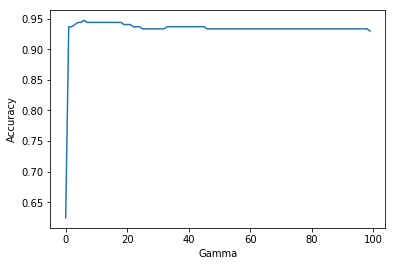

In [18]:
plt.plot(gamma_accs)
plt.ylabel('Accuracy')
plt.xlabel('Gamma')

#### Iris

In [19]:
iris = datasets.load_iris()
iris_dataframe = pd.DataFrame(iris.data)
iris_dataframe.columns = iris.feature_names
iris_dataframe['type'] = iris.target
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
import seaborn as sns

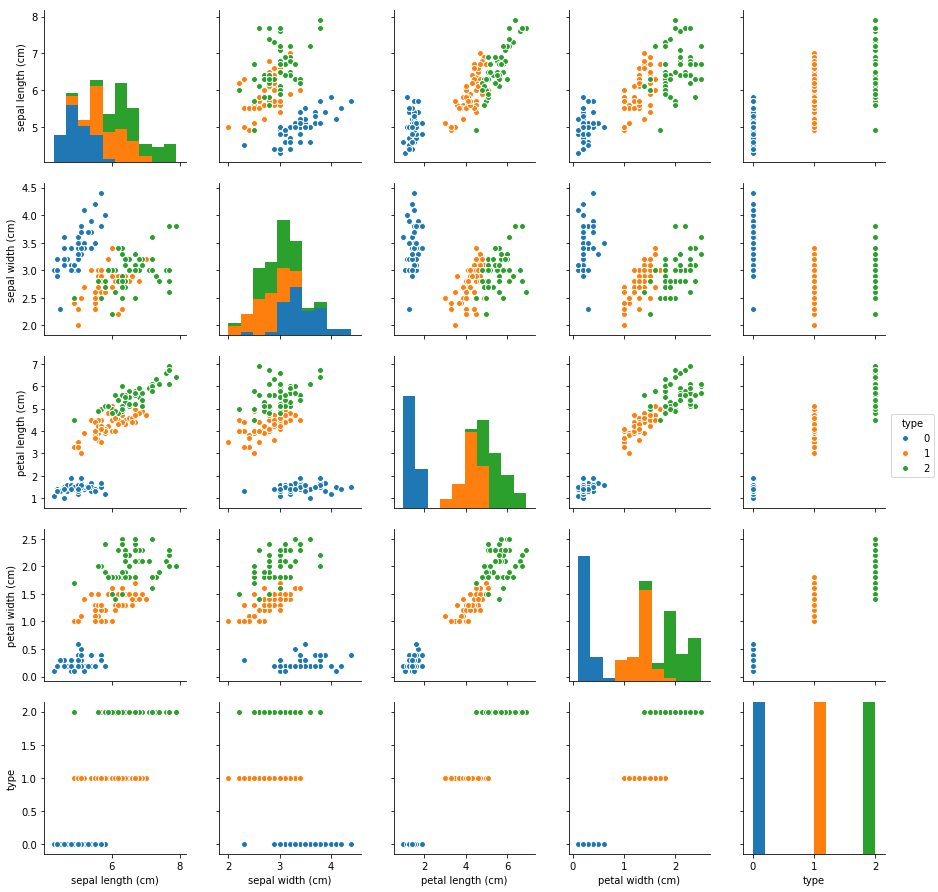

In [21]:
sns.pairplot(iris_dataframe, hue = 'type')

In [97]:
gamma_range = np.arange(0.01, 2, 0.05)
gamma_hinge_errs_mean = []
gamma_hinge_errs_std = []
gamma_accs_mean = []
gamma_accs_std = []
for gamma in gamma_range:
    svc = SVC(kernel='rbf', gamma=gamma, random_state=5)
    cv = model_selection.ShuffleSplit(n_splits=5, random_state=5)
    hinge_errs = []
    gamma_accuracy = []
    for train_inds, test_inds in cv.split(iris.data):
        train_data = iris.data[train_inds]
        test_data = iris.data[test_inds]
        train_labels = iris.target[train_inds]
        test_labels = iris.target[test_inds]
        svc.fit(train_data, train_labels)
        hinge_errs.append(metrics.hinge_loss(test_labels, svc.decision_function(test_data), labels = np.array([0, 1, 2])))
        gamma_accuracy.append(svc.score(X=test_data, y=test_labels))
    tmp_mean_err = np.array(hinge_errs).mean()
    tmp_std = np.array(hinge_errs).std()
    tmp_mean_acc = np.array(gamma_accuracy).mean()
    tmp_std_acc = np.array(gamma_accuracy).std()
    gamma_hinge_errs_mean.append(tmp_mean_err)
    gamma_hinge_errs_std.append(tmp_std)
    gamma_accs_mean.append(tmp_mean_acc)
    gamma_accs_std.append(tmp_std_acc)

Text(0,0.5,'Accuracy')

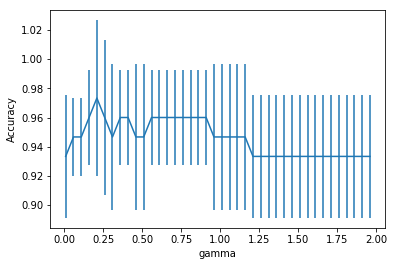

In [98]:
plt.errorbar(x=gamma_range, y=gamma_accs_mean, yerr=gamma_accs_std)
plt.xlabel('gamma')
plt.ylabel('Accuracy')

<ErrorbarContainer object of 3 artists>

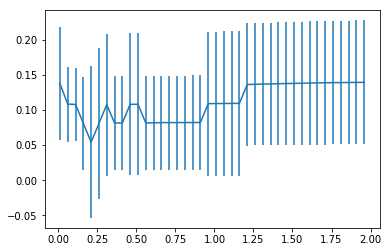

In [99]:
plt.errorbar(x=gamma_range, y=gamma_hinge_errs_mean, yerr=gamma_hinge_errs_std)

### Level 2

### Try several different SVM parameters (perhaps $C$, $\gamma$ for the RBF kernel) plotting the testing error for each. 

In [108]:
c_range = np.arange(0.1, 10, 0.1)
c_hinge_errs_mean = []
c_hinge_errs_std = []
c_accs_mean = []
c_accs_std = []
for c in c_range:
    svc = SVC(kernel='rbf', C=c, random_state=5)
    cv = model_selection.ShuffleSplit(n_splits=5, random_state=5)
    hinge_errs = []
    c_accuracy = []
    for train_inds, test_inds in cv.split(iris.data):
        train_data = iris.data[train_inds]
        test_data = iris.data[test_inds]
        train_labels = iris.target[train_inds]
        test_labels = iris.target[test_inds]
        svc.fit(train_data, train_labels)
        hinge_errs.append(metrics.hinge_loss(test_labels, svc.decision_function(test_data), labels = np.array([0, 1, 2])))
        c_accuracy.append(svc.score(X=test_data, y=test_labels))
    tmp_mean_err = np.array(hinge_errs).mean()
    tmp_std = np.array(hinge_errs).std()
    tmp_mean_acc = np.array(c_accuracy).mean()
    tmp_std_acc = np.array(c_accuracy).std()
    c_hinge_errs_mean.append(tmp_mean_err)
    c_hinge_errs_std.append(tmp_std)
    c_accs_mean.append(tmp_mean_acc)
    c_accs_std.append(tmp_std_acc)

Text(0,0.5,'Accuracy')

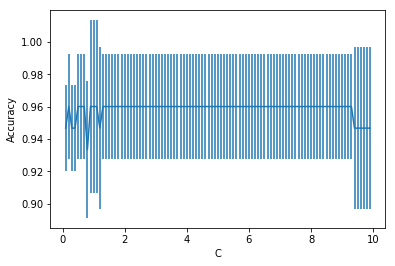

In [112]:
plt.errorbar(x=c_range, y=c_accs_mean, yerr=c_accs_std)
plt.xlabel('C')
plt.ylabel('Accuracy')

Text(0,0.5,'Hinge Loss')

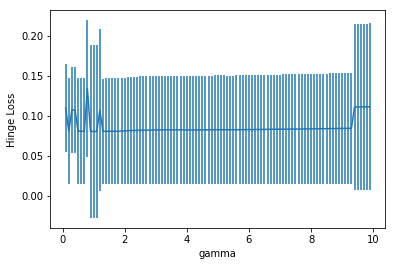

In [114]:
plt.errorbar(x=c_range, y=c_hinge_errs_mean, yerr=c_hinge_errs_std)
plt.xlabel('gamma')
plt.ylabel('Hinge Loss')

### Build a polynomial kernel and evaluate the error with d = 1, against the SVM with a linear kernel–what’s the difference between these two?


In [116]:
linear_svm = SVC(kernel='linear', random_state=5)
poly_svm = SVC(kernel='poly', degree=1, random_state=5)

In [122]:
cv = model_selection.ShuffleSplit(n_splits=5, random_state=5)
linear_hinge_errs = []
poly_hinge_errs = []
for train_inds, test_inds in cv.split(iris.data):
        train_data = iris.data[train_inds]
        test_data = iris.data[test_inds]
        train_labels = iris.target[train_inds]
        test_labels = iris.target[test_inds]
        linear_svm.fit(train_data, train_labels)
        poly_svm.fit(train_data, train_labels)
        linear_hinge_errs.append(metrics.hinge_loss(test_labels, linear_svm.decision_function(test_data), labels = np.array([0, 1, 2])))
        poly_hinge_errs.append(metrics.hinge_loss(test_labels, poly_svm.decision_function(test_data), labels = np.array([0, 1, 2])))

In [130]:
linear_hinge_mean = np.array(linear_hinge_errs).mean() 
poly_hinge_mean = np.array(poly_hinge_errs).mean()

linear_hinge_std = np.array(linear_hinge_errs).std()
poly_hinge_std = np.array(poly_hinge_errs).std()
print linear_hinge_mean, linear_hinge_std
print poly_hinge_mean, poly_hinge_std

0.15935923448724948 0.050295667464463525
0.14291057537972177 0.05055619818668143
